<a href="https://colab.research.google.com/github/iyungrozy/CNN-IMAGE-CLASSIFICATION/blob/main/2_Image_Classification_Kopi_atau_tidak_dengan_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from IPython.display import Image

In [ ]:
# Import dataset
import pathlib
path = "drive/My Drive/UAS AI/training"
data_dir = pathlib.Path(path)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

24


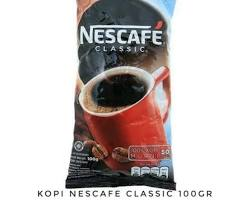

In [ ]:
Coffe = list(data_dir.glob('coffe/*'))
PIL.Image.open(str(Coffe[1]))


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 25 files belonging to 2 classes.
Using 20 files for training.
Found 25 files belonging to 2 classes.
Using 5 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['coffe', 'non coffe']


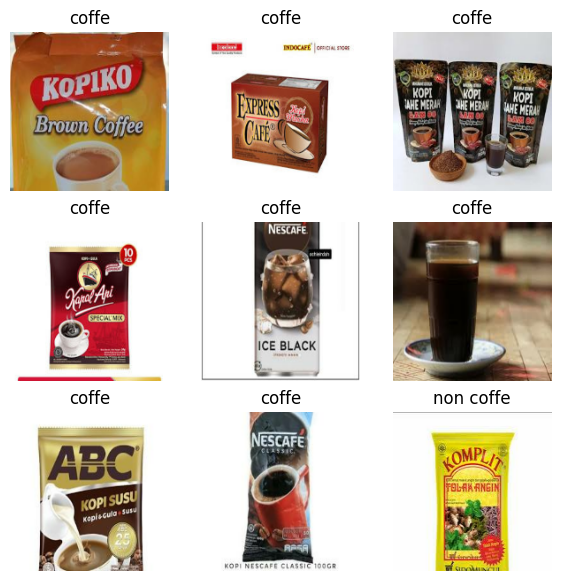

In [ ]:
plt.figure(figsize=(7, 7)) #is the size of the image that we will display
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off") # Indent the code block within the for loop

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max( first_image))

0.0 1.0


In [ ]:
num_classes = 2
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.6502 - accuracy: 0.9000 - val_loss: 4.4967 - val_accuracy: 0.8000
Epoch 2/30
1/1 [==============================] - 1s 782ms/step - loss: 2.1953 - accuracy: 0.9000 - val_loss: 3.5560 - val_accuracy: 0.8000
Epoch 3/30
1/1 [==============================] - 1s 910ms/step - loss: 1.7122 - accuracy: 0.9000 - val_loss: 2.1259 - val_accuracy: 0.8000
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 0.9945 - accuracy: 0.9000 - val_loss: 1.1304 - val_accuracy: 0.8000
Epoch 5/30
1/1 [==============================] - 1s 1s/step - loss: 0.5215 - accuracy: 0.9000 - val_loss: 0.6152 - val_accuracy: 0.8000
Epoch 6/30
1/1 [==============================] - 1s 702ms/step - loss: 0.3280 - accuracy: 0.9000 - val_loss: 0.5376 - val_accuracy: 0.8000
Epoch 7/30
1/1 [==============================] - 1s 1s/step - loss: 0.3777 - accuracy: 0.9000 - val_loss: 0.5393 - val_accuracy: 0.8000
Epoch 8/30
1/1 [================

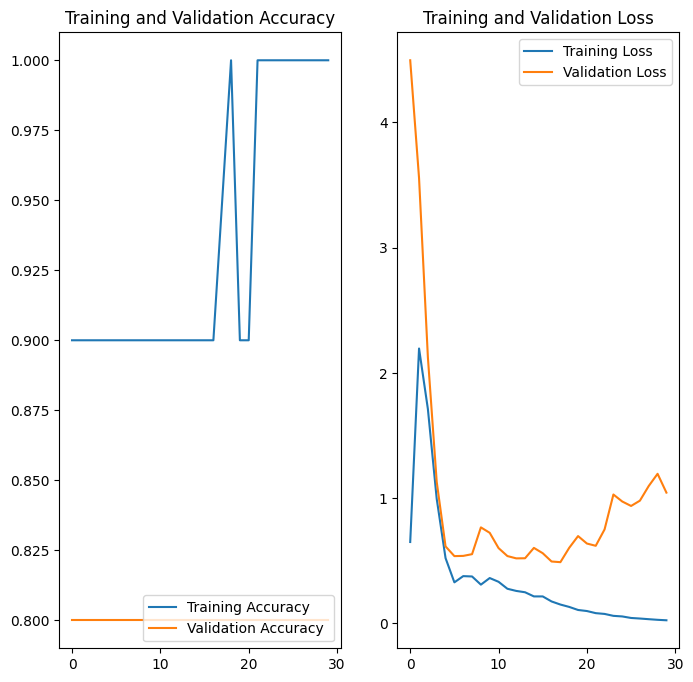

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy ')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right' )
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 1s 567ms/step


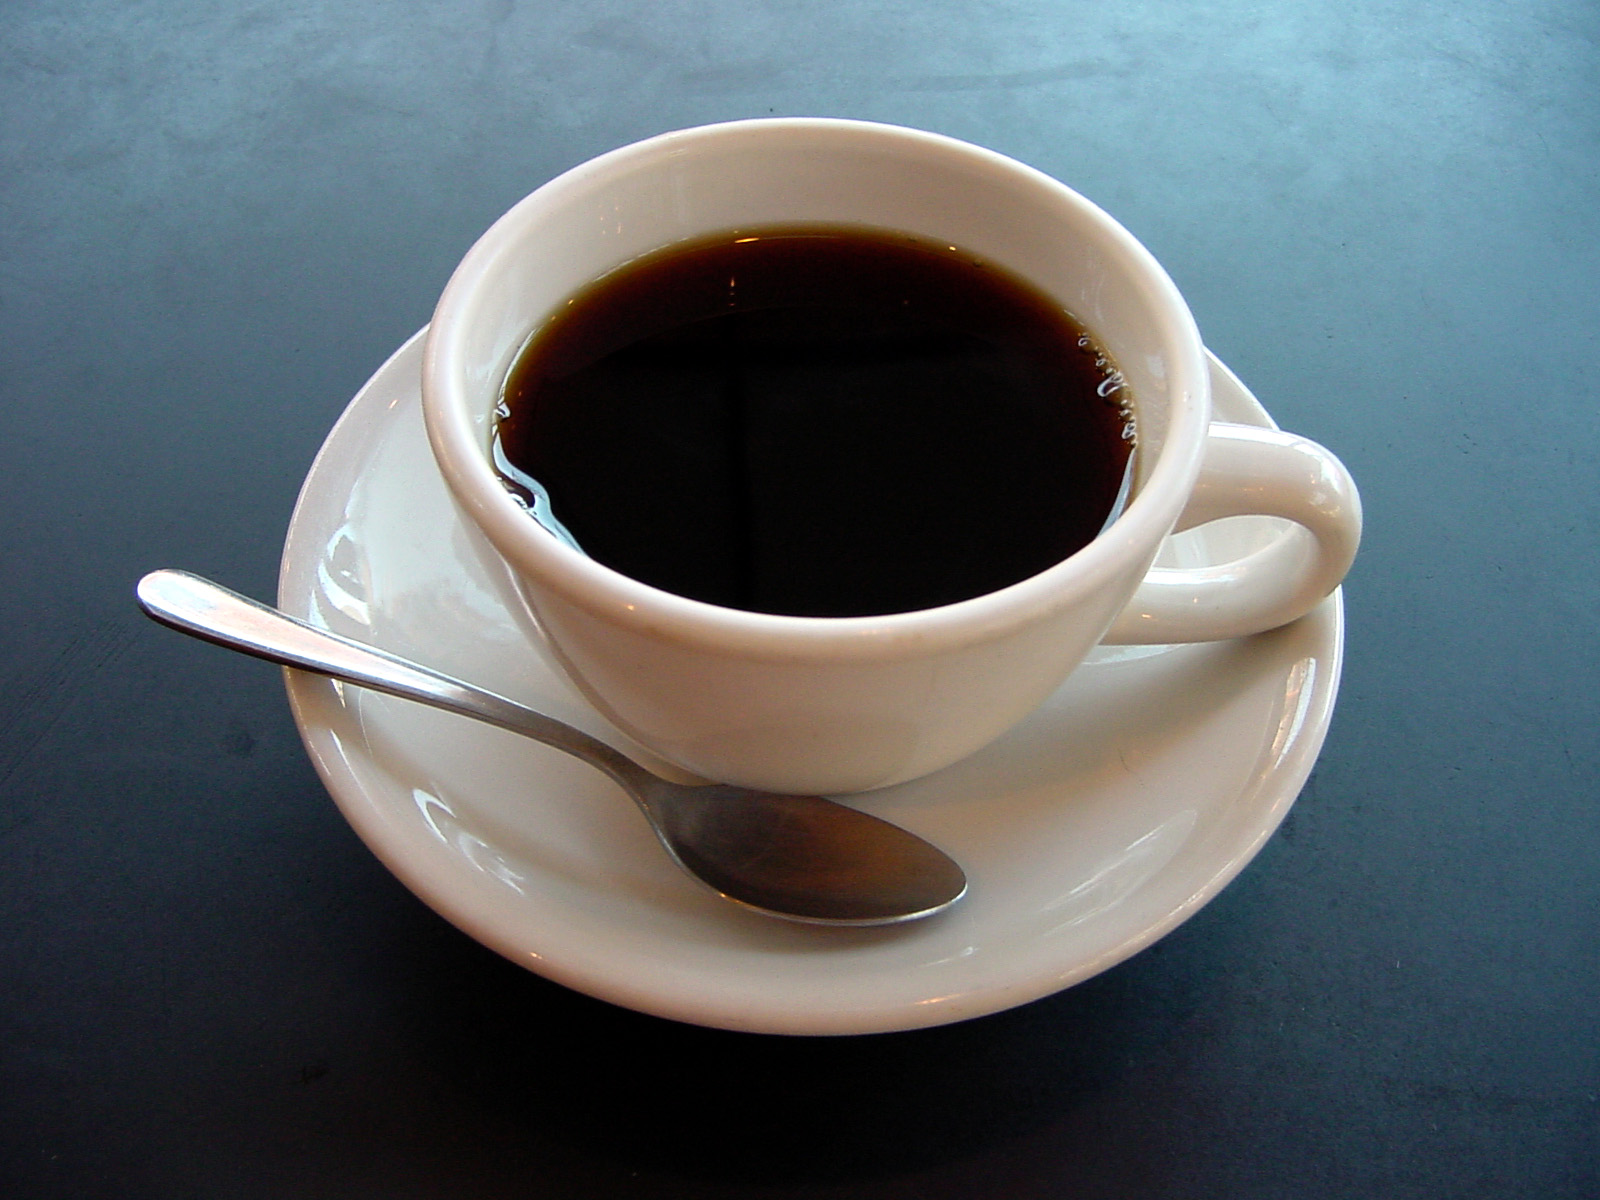

This image most likely belongs to coffe with a 99.97 percent confidence .


In [ ]:
path = "/content/drive/MyDrive/UAS AI/test/kopi.jpeg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array (img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence ."
.format(class_names[np.argmax(score)], 100 * np.max(score))
)
